<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas de soporte para regresión (SVR)

Generalmente, las máquinas de vectores de soporte se consideran un enfoque de clasificación, pero pueden emplearse tanto en tipos de problemas de clasificación como de regresión. Puede manejar fácilmente múltiples variables continuas y categóricas. SVM construye un hiperplano en un espacio multidimensional para separar diferentes clases. SVM genera un hiperplano óptimo de forma iterativa, que se utiliza para minimizar un error. La idea central de SVM es encontrar un hiperplano marginal máximo (MMH) que divida mejor el conjunto de datos en clases.
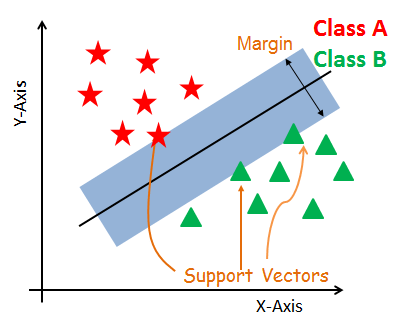

### **Vectores de soporte**
Los vectores de soporte son los puntos de datos más cercanos al hiperplano. Estos puntos definirán mejor la línea de separación calculando los márgenes. Estos puntos son más relevantes para la construcción del clasificador.

### **Hiperplano**
Un hiperplano es un plano de decisión que separa un conjunto de objetos que tienen diferentes clases de pertenencia.

### **Margen**
Un margen es un espacio entre las dos líneas de los puntos de clase más cercanos. Esto se calcula como la distancia perpendicular desde la línea hasta los vectores de soporte o puntos más cercanos. Si el margen es mayor entre las clases, entonces se considera un buen margen, un margen menor es un mal margen.

## **¿Cómo funciona SVM?**
El objetivo principal es segregar el conjunto de datos dado de la mejor manera posible. La distancia entre los puntos más cercanos se conoce como margen. El objetivo es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte en el conjunto de datos dado. SVM busca el hiperplano marginal máximo en los siguientes pasos:

Genera hiperplanos que segregan las clases de la mejor manera. Figura del lado izquierdo que muestra tres hiperplanos negro, azul y naranja. Aquí, el azul y el naranja tienen un mayor error de clasificación, pero el negro separa las dos clases correctamente.

Seleccione el hiperplano derecho con la máxima segregación de los puntos de datos más cercanos, como se muestra en la figura del lado derecho.
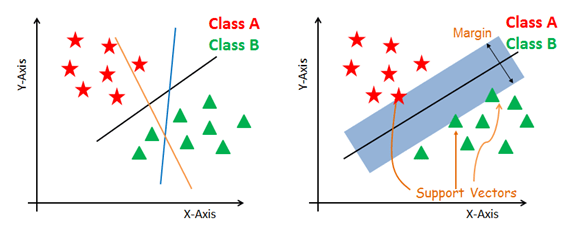

## **Tratar con planos no lineales e inseparables.**
Algunos problemas no se pueden resolver usando un hiperplano lineal, como se muestra en la siguiente figura (lado izquierdo).

En tal situación, SVM utiliza un truco del núcleo para transformar el espacio de entrada en un espacio de dimensiones superiores, como se muestra a la derecha. Los puntos de datos se trazan en los ejes x y z (Z es la suma al cuadrado de x e y: z=x^2=y^2). Ahora puedes segregar fácilmente estos puntos mediante separación lineal.


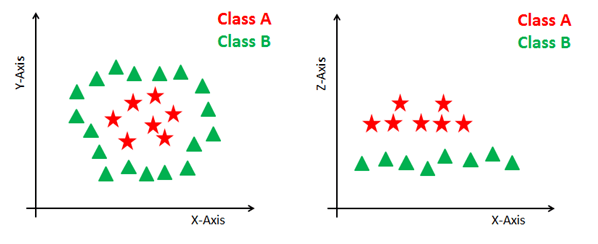

### **Núcleos SVM**

El algoritmo SVM se implementa en la práctica mediante un kernel. Un kernel transforma un espacio de datos de entrada en la forma requerida. SVM utiliza una técnica llamada truco del kernel. Aquí, el núcleo toma un espacio de entrada de baja dimensión y lo transforma en un espacio de mayor dimensión. En otras palabras, se puede decir que convierte un problema no separable en problemas separables agregándole más dimensión. Es más útil en problemas de separación no lineal. El truco del kernel te ayuda a crear un clasificador más preciso.

**Núcleo lineal**.  Un núcleo lineal se puede utilizar como producto escalar normal de dos observaciones dadas. El producto entre dos vectores es la suma de la multiplicación de cada par de valores de entrada.
`K(x, xi) = sum(x * xi)`


**Núcleo polinómico** Un núcleo polinómico es una forma más generalizada del núcleo lineal. El núcleo polinomial puede distinguir un espacio de entrada curvo o no lineal.

`K(x,xi) = 1 + sum(x * xi)^d`

Donde d es el grado del polinomio. d=1 es similar a la transformación lineal. El título debe especificarse manualmente en el algoritmo de aprendizaje.

**Núcleo de función de base radial**.
 El núcleo de función de base radial es una función de núcleo popular comúnmente utilizada en la clasificación de máquinas de vectores de soporte. RBF puede mapear un espacio de entrada en un espacio de dimensión infinita.
` K(x,xi) = exp(-gamma * sum((x – xi^2))`


## Importación de las librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importación del conjunto de datos

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Escalado de características

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Entrenamiento del modelo SVR en todo el conjunto de datos

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predecir un nuevo resultado

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualización de los resultados de SVR

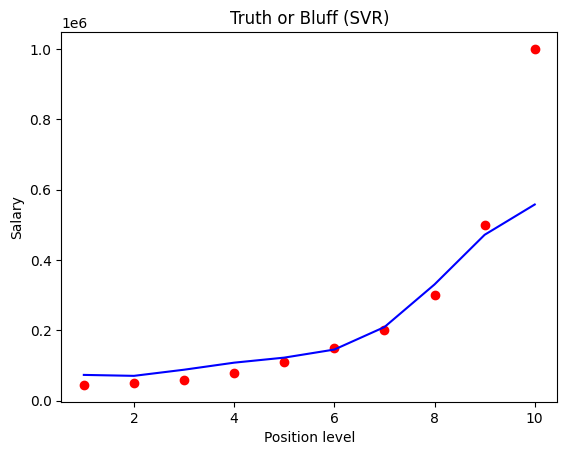

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

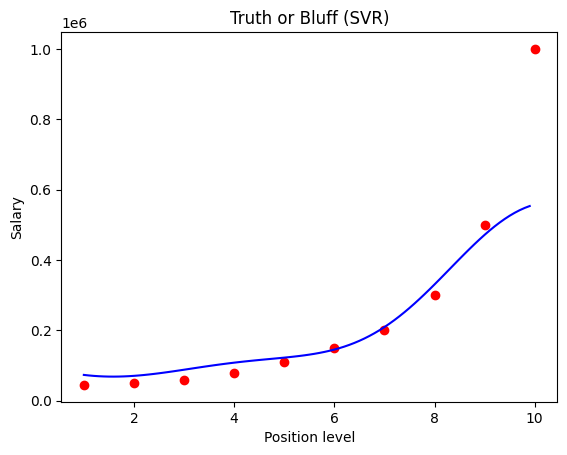

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## **Ejemplo 2**

In [ ]:
#Se importan la librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline


In [60]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [71]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [44]:
type(data)

numpy.ndarray

In [73]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [58]:
X, y = shuffle(data, target, random_state=13)
#X = X.astype(np.float32)
#offset = int(X.shape[0] * 0.9)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

In [63]:
# Scaling will transform the feature values so that they are confined to a range [a, b], typically [0, 1] or [-1, 1].
from sklearn.model_selection import train_test_split

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [62]:
X_train

array([[1.46336e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.74430e+02, 1.73000e+00],
       [1.22358e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.63430e+02, 4.59000e+00],
       [9.72418e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.85960e+02, 1.95200e+01],
       ...,
       [3.93200e-02, 0.00000e+00, 3.41000e+00, ..., 1.78000e+01,
        3.93550e+02, 8.20000e+00],
       [1.58744e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.10800e+01],
       [5.57780e-01, 0.00000e+00, 2.18900e+01, ..., 2.12000e+01,
        3.94670e+02, 1.69600e+01]])

In [64]:
# ============ Model 4. SVM "linear" =================================

# Creation of the model
from sklearn.svm import SVR

regressor = SVR(kernel="linear", C=100, gamma="auto")

#Train the model using the training sets

regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_regressor = regressor.predict(X_test)

# Evaluating Model

#print("R^2 test svm_linear:  ", r2_score(y_test, y_pred_regressor))
r2_svm_linear = regressor.score(X_test, y_test)
print("R^2 test svm_linear: %.4f "%r2_svm_linear)
mse_svm_linear = mean_squared_error(y_test,y_pred_regressor)
print("MSE svm_linear: %.4f" % mse_svm_linear)
rmse_svm_linear = np.sqrt(mse_svm_linear)
print("RMSE svm_linear: %.4f" %rmse_svm_linear )

R^2 test svm_linear: 0.3683 
MSE svm_linear: 60.7358
RMSE svm_linear: 7.7933


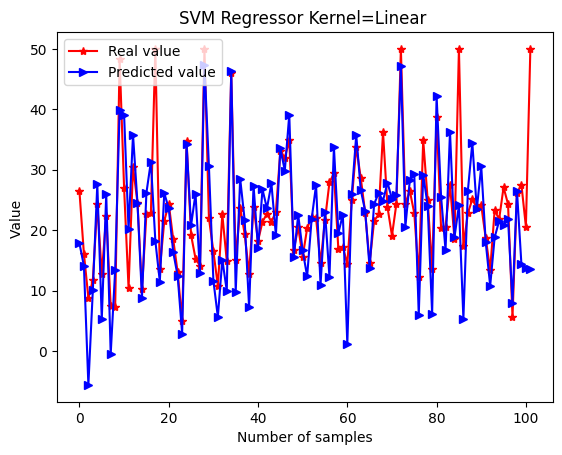

In [69]:
### Plot Predicted Values ​​and Test Values

z = np.arange(len(y_pred_regressor))
plt.plot(z,y_test, color="red", marker="*", label = "Real value")
plt.plot(z,y_pred_regressor, color="blue", marker=">", label = "Predicted value")
plt.title("SVM Regressor Kernel=Linear ")
plt.xlabel("Number of samples")
plt.ylabel("Value ")
plt.legend(loc = "upper left")
plt.show()
